# Quick Start Guide

We're going to use `cosi` to perform an MCMC simulation to estimate the stellar inclination angle ($i$) from stellar parameters: line-of-sight rotational velocity ($v\sin(i)$), stellar radius ($R_{\star}$), and stellar rotation period ($P_{rot}$).

In [1]:
from cosi import CosI

First, initialize the `CosI` class with `vsini`, `e_vsini`, `rstar`, `e_rstar`, `prot`, and `e_prot` where parameters with 'e_' represent uncertainties. `vsini` is in km/s, `rstar` is in solar radii, and `prot` is in days.

In [2]:
c = CosI(7.3, 0.3, 0.912, 0.034, 6.45, 0.05)

Now, we run the MCMC estimation with 100 walkers for 1500 steps and extract the posterior distribution for $\cos(i)$. By default, `get_posterior()` will discard the first 500 steps as burn-in.

In [3]:
sampler = c.run_mcmc(100, 1500)

cosi = c.get_posterior(sampler)

100%|██████████| 1500/1500 [00:01<00:00, 806.64it/s]


Now that we have the posterior distribution, let's convert it to an angle in degrees and plot it as a histogram using `matplotlib.pyplot`.

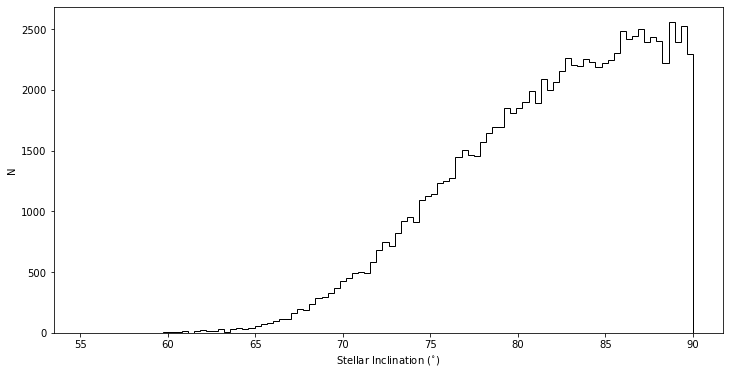

In [4]:
import numpy as np
import matplotlib.pyplot as plt

i = np.arccos(cosi) * 180 / np.pi

plt.figure(figsize=(12,6))

plt.hist(i, bins=100, histtype='step', color='black')

plt.xlabel("Stellar Inclination ($^{\\circ}$)")
plt.ylabel("N")

plt.show()